Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries,

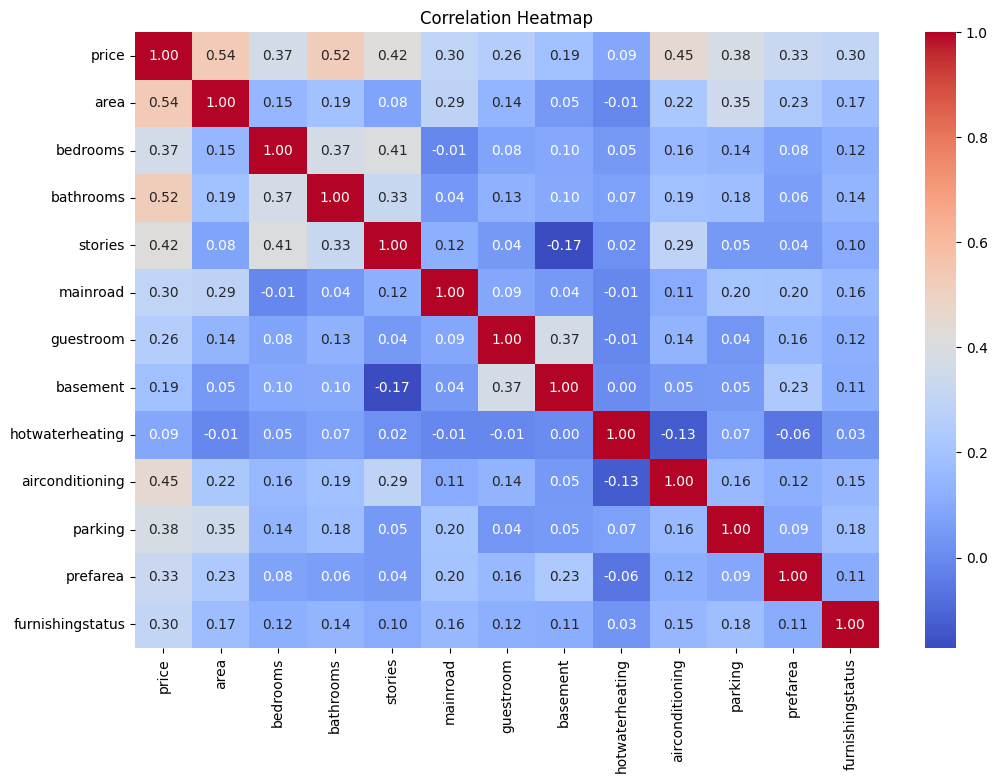

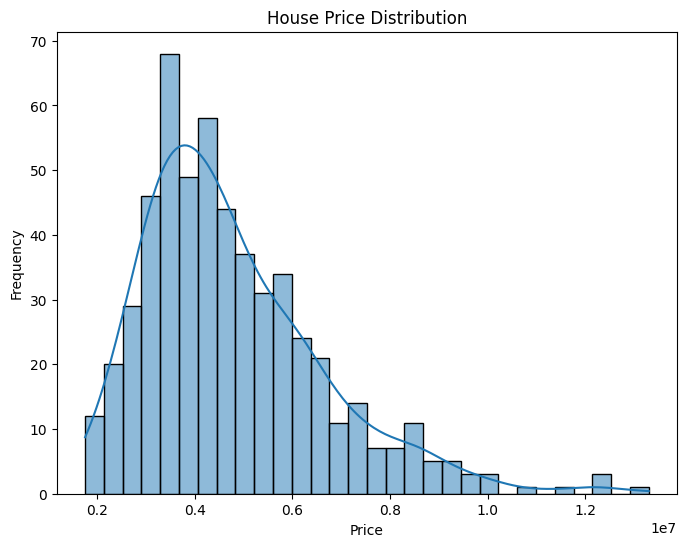


Mean Squared Error: 1956925181711.52
R-squared Score: 0.61

Feature Importances:
             Feature  Importance
0               area    0.468729
2          bathrooms    0.151624
8    airconditioning    0.062203
3            stories    0.056827
9            parking    0.056572
11  furnishingstatus    0.049643
1           bedrooms    0.048022
6           basement    0.031912
10          prefarea    0.030574
7    hotwaterheating    0.017405
5          guestroom    0.016588
4           mainroad    0.009902


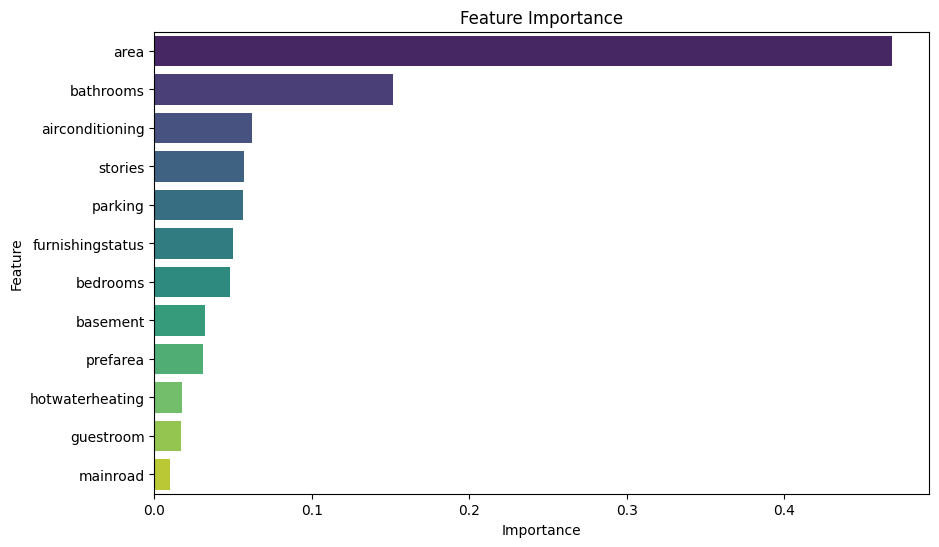

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Suppress FutureWarning from seaborn or pandas
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
file_path = "/kaggle/input/housepr/House Price.csv"  # Update this if the file is in another location
dataset = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
print(dataset.head())

# Basic EDA
print("\nBasic Information:")
print(dataset.info())
print("\nSummary Statistics:")
print(dataset.describe())

# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

# Convert categorical variables to numeric
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    if col == 'furnishingstatus':
        dataset[col] = dataset[col].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
    else:
        dataset[col] = dataset[col].map({'no': 0, 'yes': 1})

# Ensure only numeric columns are used for the correlation matrix
numeric_columns = dataset.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(dataset['price'], kde=True, bins=30)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Feature selection
X = dataset.drop(columns='price')  # Features
y = dataset['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()